In [2]:
#Задачи: Линейная регрессия
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
# Вывести значения коэффициентов модели.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for i in range(1, X.shape[1] + 1):
    model = LinearRegression()
    model.fit(X_train.iloc[:, :i], y_train)
    y_pred = model.predict(X_test.iloc[:, :i])
    mse = mean_squared_error(y_test, y_pred)
    print(f'Число признаков: {i}, MSE: {mse}')
    print('Коэффициенты:', model.coef_)

Число признаков: 1, MSE: 10.459766625795496
Коэффициенты: [0.04770602]
Число признаков: 2, MSE: 2.0198651903380225
Коэффициенты: [0.04625453 0.18314343]
Число признаков: 3, MSE: 2.0305986002729197
Коэффициенты: [ 0.04630943  0.18447317 -0.00240298]


In [11]:
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)

Степень полинома: 1, MSE: 4.402118291449683
Степень полинома: 2, MSE: 0.8957093546995989
Степень полинома: 3, MSE: 0.672134441822469
Степень полинома: 4, MSE: 0.6742573652808455
Степень полинома: 5, MSE: 18.237583728149296
Степень полинома: 6, MSE: 1482.7797239182469
Степень полинома: 7, MSE: 73878.90614245133
Степень полинома: 8, MSE: 184914.75349431374
Степень полинома: 9, MSE: 81953894933.11594
Степень полинома: 10, MSE: 358697136746.402


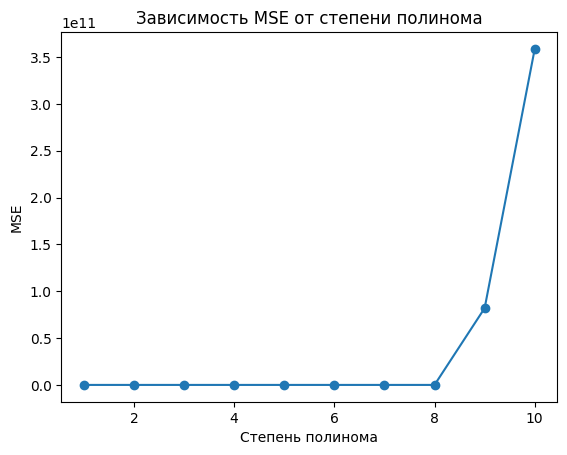

In [24]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

mse_values = []

# MSE от разной степени полинома
for degree in range(1, 11):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    print(f'Степень полинома: {degree}, MSE: {mse}')

plt.plot(range(1, 11), mse_values, marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('MSE')
plt.title('Зависимость MSE от степени полинома')
plt.show()

In [25]:
# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha.

C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00579e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.46479e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.13324e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.10674e-20): result may not be accurate.
  return lina

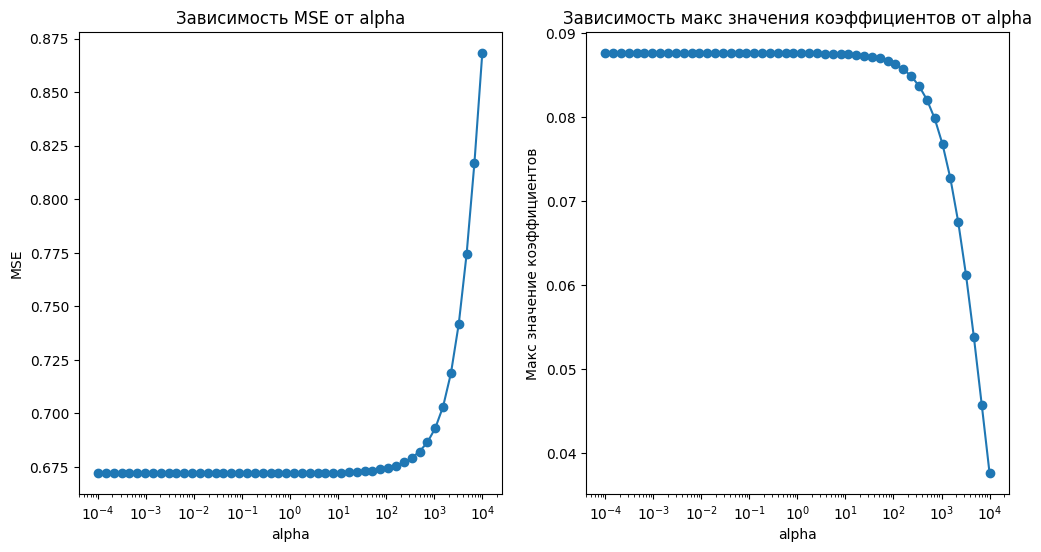

In [26]:
from sklearn.linear_model import Ridge
import numpy as np

alpha_values = np.logspace(-4, 4, 50)
mse_values = []
max_coef_values = []

# Используем степень полинома 3
optimal_degree = 3
poly = PolynomialFeatures(optimal_degree)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    max_coef_values.append(np.max(np.abs(model.coef_)))

# Графики зависимости
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Зависимость MSE от alpha')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, max_coef_values, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Макc значение коэффициентов')
plt.title('Зависимость макс значения коэффициентов от alpha')

plt.show()

In [27]:
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+01, tolerance: 4.128e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+01, tolerance: 4.128e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

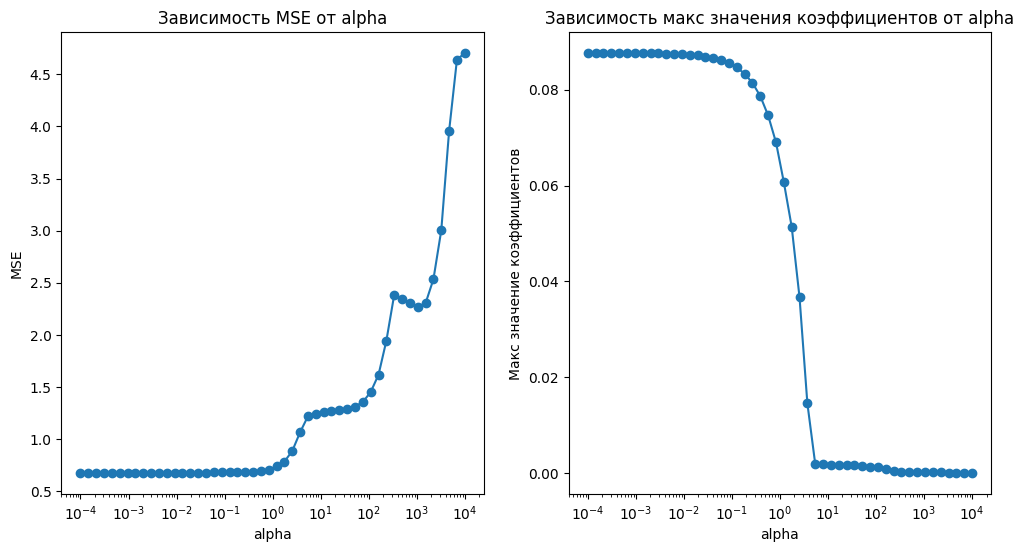

In [28]:
from sklearn.linear_model import Lasso

mse_values = []
max_coef_values = []

for alpha in alpha_values:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    max_coef_values.append(np.max(np.abs(model.coef_)))

# Графики зависимости
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Зависимость MSE от alpha')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, max_coef_values, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Макс значение коэффициентов')
plt.title('Зависимость макс значения коэффициентов от alpha')

plt.show()

In [29]:
#SVR
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
# Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'
# Реализовать модель SVRб учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'degree': [2, 3, 4]
}

svr = SVR()

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

Лучшие параметры: {'C': 1, 'degree': 2, 'epsilon': 1, 'kernel': 'sigmoid'}
MSE: 36.16337706038202
